## Question 1
- Read data from `Crime.csv` then print the names of the columns which have missing values.
- Drop any row that has missing values.
- Which three subcategories have the top three event counts?

In [1]:
#Your Code Here
import pandas as pd

df = pd.read_csv('Crime.csv')
list(df.columns[df.isna().sum() > 0])

['Occurred Date',
 'Occurred Time',
 'Reported Time',
 'Crime Subcategory',
 'Precinct',
 'Sector',
 'Beat']

In [2]:
#Your Code Here

dropped = df.dropna(axis = 0)

In [3]:
#Your Code Here

dropped["Crime Subcategory"].value_counts().head(3)

Crime Subcategory
CAR PROWL          144128
THEFT-ALL OTHER     52389
THEFT-SHOPLIFT      47227
Name: count, dtype: int64

## Question 2
- Create two new columns (these two columns should be datetime objects):
    - `Occurred DateTime`= `Occurred Date` + `Occurred Time` 
    - `Reported DateTime` = `Reported Date` + `Reported Time` 
- Delete the following columns: `Occurred Date`, `Occurred Time`, `Reported Date`, `Reported Time`

- **Hints**: 
    - The panadas function **pd.to_datetime** can help
    - The loaded Occurred/Reported Time appears to be a float like '1930.0'. This should be interpreted as '19:30:00' eventually

In [4]:
#Your Code Here
'''
dropped['Occurred Date'] = pd.to_datetime(dropped['Occured Date'])
dropped['Occurred Time'] = pd.to_datetime(dropped['Occured Time'])
dropped['Occurred DateTome'] = dropped['Occurred Date'] + dropped['Occurred Time']

dropped
'''

dropped.dtypes

Report Number                    int64
Occurred Date                   object
Occurred Time                  float64
Reported Date                   object
Reported Time                  float64
Crime Subcategory               object
Primary Offense Description     object
Precinct                        object
Sector                          object
Beat                            object
Neighborhood                    object
dtype: object

In [5]:
#Your Code Here

## Question 3

- The crime subcategories are too fine-grained for our analysis. So regroup several subcategories together into 8 major categories: `[Thefts, Burglary, Robbery, Alcohol_Drug, Sex_Related, Homicide, Misc]`

- Construct a mapping dictionary from the subcategories to the corresponding major crime types, then use it by creating a new column called `crime_type`.
mapping dictionary.:
    - For example, we would like to map `CAR PROWL`, `MOTOR VEHICLE THEFT`, ... to `thefts`.
    - We would like to map `ROBBERY-STREET`, `ROBBERY-RESIDENTIAL`,... to `robbery`, etc.
    
**hint**: you can use df[col].map to map a column to values in a dictionary

In [6]:
#Your Code Here
mappingDict={
    'MOTOR VEHICLE THEFT': 'Thefts',
    'THEFT-ALL OTHER': 'Thefts',
    'THEFT-BUILDING': 'Thefts',
    'THEFT-BICYCLE': 'Thefts',
    'THEFT-SHOPLIFT': 'Thefts',
    'BURGLARY-COMMERCIAL': 'Burglary',
    'BURGLARY-RESIDENTIAL-SECURE PARKING': 'Burglary',
    'BURGLARY-COMMERCIAL-SECURE PARKING': 'Burglary',
    'BURGLARY-RESIDENTIAL': 'Burglary',
    'ROBBERY-STREET': 'Robbery',
    'ROBBERY-RESIDENTIAL': 'Robbery',
    'ROBBERY-COMMERCIAL': 'Robbery',
    'LIQUOR LAW VIOLATION': 'Alcohol_Drug',
    'DUI': 'Alcohol_Drug',
    'RAPE': 'Sex_Related',
    'PROSTITUTION': 'Sex_Related',
    'SEX OFFENSE-OTHER': 'Sex_Related',
    'AGGRAVATED ASSAULT-DV': 'Sex_Related',
    'AGGRAVATED ASSAULT': 'Sex_Related',
    'PORNOGRAPHY': 'Sex_Related',
    'HOMICIDE': 'Homicide',
    'CAR PROWL': 'Misc',
    'WEAPON': 'Misc',
    'ARSON': 'Misc',
    'GAMBLE': 'Misc',
    'DISORDERLY CONDUCT': 'Misc',
    'FAMILY OFFENSE-NONVIOLENT': 'Misc',
    'LOITERING': 'Misc',
    'TRESPASS': 'Misc',
    'NARCOTIC': 'Alcohol_Drug'
}
#Your Code Here

dropped['crime_type'] = dropped['Crime Subcategory'].map(lambda x: mappingDict[x])



/var/folders/kx/58cjbwzx5jjgn5w_sjz3qk0w0000gn/T/ipykernel_3950/2831600459.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['crime_type'] = dropped['Crime Subcategory'].map(lambda x: mappingDict[x])


## Question 4
- Compare `visually` the average time gap between **Reported DateTime** vs **Occurred DateTime** of different crimes types.

**Hints**: 
- You can get the time in seconds from datetime column using `df[col_name].dt.total_seconds()`.
- You can convert seconds to datetime usine `pd.to_timedelta(df["sec"], unit='s')`

In [7]:
#Your Code Here
import seaborn as sns
import matplotlib.pyplot as plt

## Question 5
- Show `visually` the top 5 most dangerous neighorhood in the EAST Precinct (with number of crime events in each neighorhood)

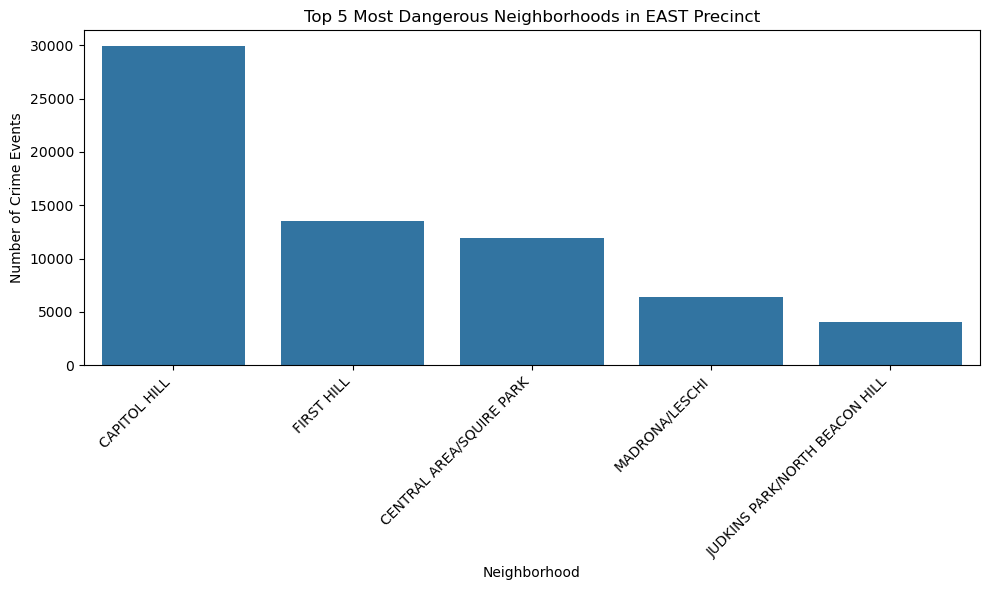

In [8]:
#Your Code Here

eastDf = dropped[dropped['Precinct'] == 'EAST']


neighborhood_counts = eastDf['Neighborhood'].value_counts().head(5)

plt.figure(figsize=(10, 6))  # Set figure size for better visibility
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values)

# Customize the plot
plt.title('Top 5 Most Dangerous Neighborhoods in EAST Precinct')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crime Events')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
# sns.barplot(x = neighborhood_counts.index, y = neighborhood_counts.values)

## Question 6
- Create column called **year** that shows the year of the crime. Which year has the lowest and highest crime event counts, respectively?
- Plot the number of `Thefts` crimes in the last ten years

In [27]:
#Your Code Here


dropped['year'] = dropped['Occurred Date'].str.split('/').str[-1]
dropped.groupby('year').size().nlargest(3)

/var/folders/kx/58cjbwzx5jjgn5w_sjz3qk0w0000gn/T/ipykernel_3950/3771889307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['year'] = dropped['Occurred Date'].str.split('/').str[-1]


year
2018    50675
2017    49948
2014    49096
dtype: int64

<Axes: xlabel='year'>

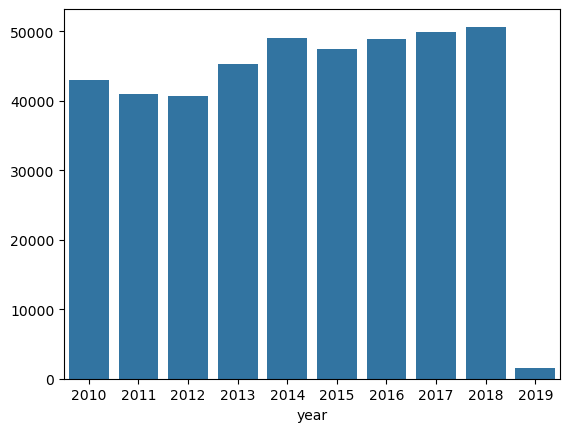

In [30]:
#Your Code Here

grouped = dropped.groupby('year').size()[-10:]
sns.barplot(x = grouped.index, y = grouped.values)

## Question 7
- keep only crime events occurred in-between **2008-2018** (remove all other crimes).
- Show `visually` which crime type has the highest percentage of events

In [11]:
#Your Code Here

In [12]:
#Your Code Here

## Question 8
- Analyze the crime prevalence in terms of week days (create column called `day` that specifies the day of the crime).
- Which weekday (Sunday, Monday, ....Saturday) has highest/lowest daily Homicide crime count? (Visualize your findings)

**Hint:** use `.day_name()` with time object to get the day

In [13]:
#Your Code Here

In [14]:
#Your Code Here

## Extra Credit Questions

- Consider the 24 hours window into 6 frames '12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am'. Create a column called `Occured TimeFrame` that contains the crime occurred time frame.

- Compare `visually` time-frames in term of the number of crimes.
- Print the name of the most dangerous neighborhood in the WEST Precinct, Then Show `visually` the percentages of crimes during different TimeFrames in that neighborhood

In [15]:
# Your Code Here

In [16]:
#Your Code Here

In [17]:
#Your Code Here

In [18]:
#Your Code Here